In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

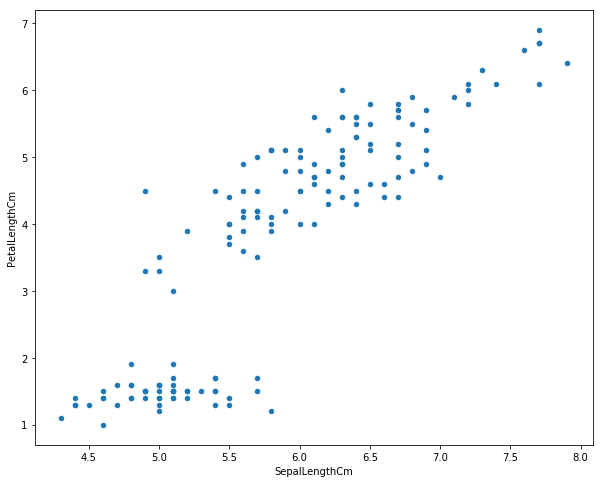

In [6]:
fig, ax = plt.subplots(figsize = (10, 8))
df.plot.scatter(features[0], features[1], ax = ax)

In [8]:
scaler = preprocessing.StandardScaler()
X = df[features].values
X = scaler.fit_transform(X)

In [19]:
%%time
kmeans = cluster.KMeans(n_clusters=3, random_state=1, )
y = kmeans.fit_predict(X)

CPU times: user 27.2 ms, sys: 2.65 ms, total: 29.8 ms
Wall time: 28.1 ms


In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

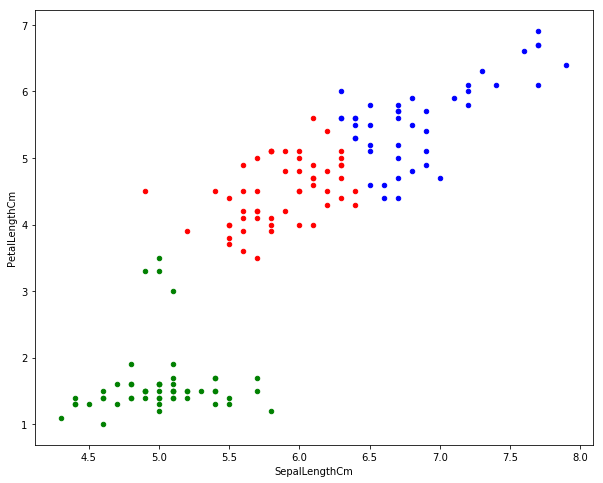

In [16]:
fig, ax = plt.subplots(figsize = (10, 8))
df[y==0].plot.scatter(features[0], features[1], ax = ax, color = "red")
df[y==1].plot.scatter(features[0], features[1], ax = ax, color = "green")
df[y==2].plot.scatter(features[0], features[1], ax = ax, color = "blue")

In [17]:
kmeans.inertia_

43.038870666761774

In [18]:
kmeans.cluster_centers_ # sum of distances ... distance for each point to its closest centroid 

array([[ 0.03665519,  0.41727267],
       [-1.01511749, -1.22859407],
       [ 1.22961906,  1.02857275]])

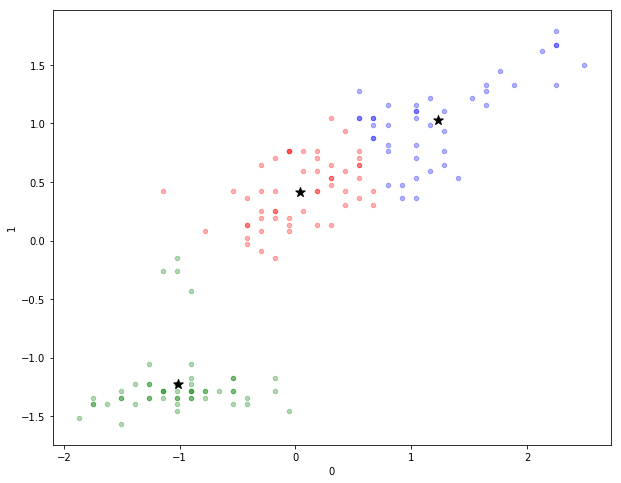

In [25]:
df_std = pd.DataFrame(X)
fig, ax = plt.subplots(figsize = (10, 8))
df_std[y==0].plot.scatter(0, 1, ax = ax, color = "red", alpha = 0.3)
df_std[y==1].plot.scatter(0, 1, ax = ax, color = "green", alpha = 0.3)
df_std[y==2].plot.scatter(0, 1, ax = ax, color = "blue", alpha = 0.3)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, ax = ax, color = "black", marker = "*", s = 100)

In [29]:
distances = np.zeros(len(y))
for i in range(3):
    points = X[y==i]
    centroid = kmeans.cluster_centers_[i]
    distances[y==i] = np.sqrt(np.sum((points - centroid) ** 2, axis = 1))
df_std["distance"] = distances   

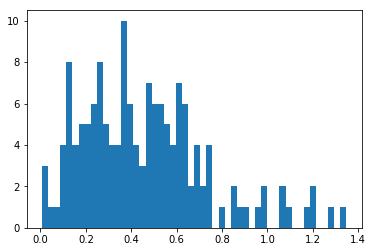

In [31]:
plt.hist(distances, bins = 50);

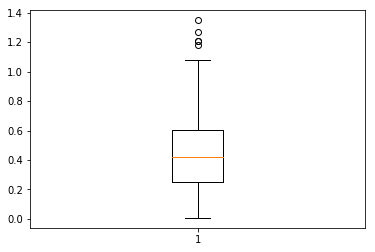

In [33]:
plt.boxplot(distances);

In [40]:
threshold = np.percentile(distances, [90])[0]
threshold

0.8091396267469859

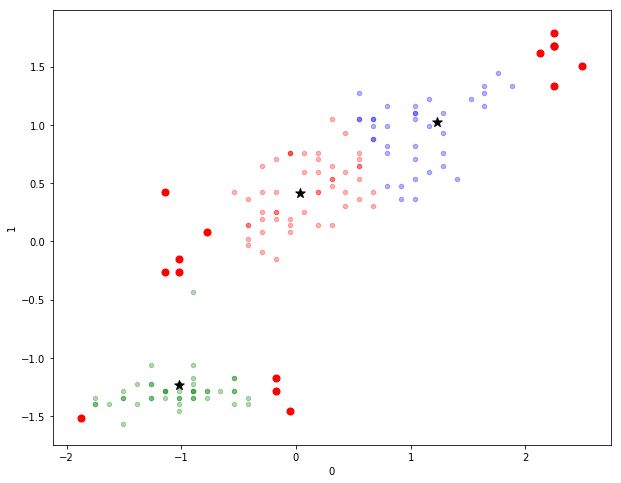

In [41]:
df_std = pd.DataFrame(X)
fig, ax = plt.subplots(figsize = (10, 8))
df_std[y==0].plot.scatter(0, 1, ax = ax, color = "red", alpha = 0.3)
df_std[y==1].plot.scatter(0, 1, ax = ax, color = "green", alpha = 0.3)
df_std[y==2].plot.scatter(0, 1, ax = ax, color = "blue", alpha = 0.3)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, ax = ax, color = "black", marker = "*", s = 100)

anamolies = df_std[distances>threshold].plot.scatter(0, 1, ax = ax, color = "red", s = 50)

In [36]:
df_std[distances>1.23918885]

,0,1
118,2.249683,1.786341
131,2.492019,1.502013


In [42]:
scaler.inverse_transform(X)

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [43]:
y_true = preprocessing.LabelEncoder().fit_transform(df.Species)
metrics.homogeneity_score(y_true, y)

0.5826296711195839

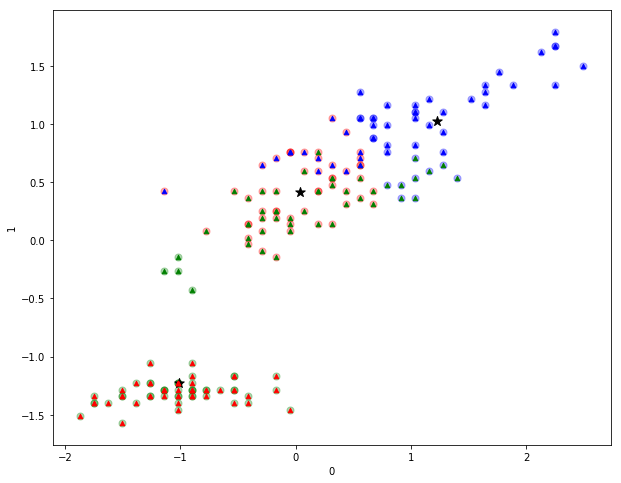

In [46]:
df_std = pd.DataFrame(X)
fig, ax = plt.subplots(figsize = (10, 8))
df_std[y==0].plot.scatter(0, 1, ax = ax, color = "red", alpha = 0.3, s = 50 )
df_std[y==1].plot.scatter(0, 1, ax = ax, color = "green", alpha = 0.3, s = 50)
df_std[y==2].plot.scatter(0, 1, ax = ax, color = "blue", alpha = 0.3, s = 50)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, ax = ax, color = "black", marker = "*", s = 100)

#anamolies = df_std[distances>threshold].plot.scatter(0, 1, ax = ax, color = "red", s = 50)

df_std[y_true==0].plot.scatter(0, 1, ax = ax, color = "red", marker = "^")
df_std[y_true==1].plot.scatter(0, 1, ax = ax, color = "green", marker = "^")
df_std[y_true==2].plot.scatter(0, 1, ax = ax, color = "blue", marker = "^")
